<h1><center>Lab 3: Clustering</center></h1>
<h3><center>A Deeper Analysis of Covid-19 Data</center></h3>
<p><center>DS 7331</center></p>
<p><center>Created by Sadik Aman, Dawn Bowerman, Zachary Harris, Alexandre Jasserme</center></p>

<p><center>Sections of this code was adapted from: 
    <li>https://github.com/jakemdrew/DataMiningNotebooks</li>
    <li> https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html</li>
    <li> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html </li>
    <li> https://machinelearningmastery.com/random-forest-ensemble-in-python/ </li>

## Business Understanding 1 - Alex

### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)

This dataset is published in the 'Our World in Data' website which is a collection of existing datasets. 
Source: https://github.com/owid/covid-19-data/tree/master/public/data 
Citation:
Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

>This dataset was partially obtained from:
The Covid-19 Data Repository which is for the Coronavirus Visual Dashboard by the Center for Systems Science and Engineering at Johns Hopkins University.  The data has been accumulated from many official sources, which are documented on the github, since January 22, 2020 on confirmed Covid-19 cases and deaths for all countries.  https://github.com/CSSEGISandData/COVID-19
Other attributes were from official government reports documented in the codebook. There were originally 67 attributes and 154,105 records.  They are presented below with descriptions from the website:

>**Confirmed cases**                                                      
total_cases: 	                               		Total confirmed cases of COVID-19,
new_cases: 				New confirmed cases of COVID-19<br>
new_cases_smoothed:			New confirmed cases of COVID-19 (7-day smoothed)<br>
total_cases_per_million: 			Total confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_per_million: 			New confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_smoothed_per_million: 		New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people<br>


>**Confirmed deaths**<br>
total_deaths: 				Total deaths attributed to COVID-19<br>
new_deaths: 				New deaths attributed to COVID-19<br>
new_deaths_smoothed: 			New deaths attributed to COVID-19 (7-day smoothed)<br>
total_deaths_per_million: 			Total deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_per_million: 			New deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_smoothed_per_million: 		New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people<br>



>**Excess mortality**<br>
excess_mortality: 				Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the 							projected number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative: 			Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative 						projected deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_absolute: 		Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_per_million: 	Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years, per million people.<br> 


>**Hospital & ICU**<br>
icu_patients: 				Number of COVID-19 patients in intensive care units (ICUs) on a given day<br>
icu_patients_per_million: 			Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people<br>
hosp_patients: 				Number of COVID-19 patients in hospital on a given day<br>
hosp_patients_per_million: 			Number of COVID-19 patients in hospital on a given day per 1,000,000 people<br>
weekly_icu_admissions: 			Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week<br>
weekly_icu_admissions_per_million: 		Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 					people<br>
weekly_hosp_admissions: 			Number of COVID-19 patients newly admitted to hospitals in a given week<br>
weekly_hosp_admissions_per_million: 		Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people<br>


>**Policy responses**<br>
stringency_index: 				Government Response Stringency Index: composite measure based on 9 response indicators including 							school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest 							response)<br>

>**Reproduction rate**<br>
reproduction_rate:				Real-time estimate of the effective reproduction rate (R) of COVID-19.
The basic reproduction number, also known as the R or R0, is the average number of people one person with an infectious disease will likely infect in the future.
<br>


>**Tests & positivity**<br>
total_tests: 				Total tests for COVID-19<br>
new_tests: 				New tests for COVID-19 (only calculated for consecutive days)<br>
total_tests_per_thousand: 			Total tests for COVID-19 per 1,000 people<br>
new_tests_per_thousand: 			New tests for COVID-19 per 1,000 people<br>
new_tests_smoothed: 			New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we 							assume that testing changed equally on a daily basis over any periods in which no data was reported. This 							produces a complete series of daily figures, which is then averaged over a rolling 7-day window<br>
new_tests_smoothed_per_thousand: 		New tests for COVID-19 (7-day smoothed) per 1,000 people<br>
positive_rate: 				The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of 					tests_per_case)<br>
tests_per_case: 				Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of 					positive_rate)<br>
tests_units: 				Units used by the location to report its testing data<br>


>**Vaccinations**<br>
total_vaccinations: 				Total number of COVID-19 vaccination doses administered<br>
people_vaccinated: 				Total number of people who received at least one vaccine dose<br>
people_fully_vaccinated: 			Total number of people who received all doses prescribed by the vaccination protocol<br>
total_boosters: 				Total number of COVID-19 vaccination booster doses administered (doses administered beyond the 							number prescribed by the vaccination protocol)<br>
new_vaccinations: 				New COVID-19 vaccination doses administered (only calculated for consecutive days)<br>
new_vaccinations_smoothed: 			New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report 							vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any 							periods in which no data was reported. This produces a complete series of daily figures, which is then 							averaged over a rolling 7-day window<br>
total_vaccinations_per_hundred: 		Total number of COVID-19 vaccination doses administered per 100 people in the total population<br>
people_vaccinated_per_hundred: 		Total number of people who received at least one vaccine dose per 100 people in the total population<br>
people_fully_vaccinated_per_hundred: 		Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the 					total population<br>
total_boosters_per_hundred: 			Total number of COVID-19 vaccination booster doses administered per 100 people in the total population<br>
new_vaccinations_smoothed_per_million: 	New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total 							population<br>
new_people_vaccinated_smoothed: 		Daily number of people receiving their first vaccine dose (7-day smoothed)<br>
new_people_vaccinated_smoothed_per_hundred: 	Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total 							population<br>


>**Others**<br>
iso_code: 					ISO 3166-1 alpha-3 – three-letter country codes<br>
continent: 					Continent of the geographical location<br>
location: 					Geographical location<br>
date: 					Date of observation<br>
population: 				Population (latest available values)<br> 
population_density: 				Number of people divided by land area, measured in square kilometers, most recent year available<br>
median_age: 				Median age of the population, UN projection for 2020<br>
aged_65_older: 				Share of the population that is 65 years and older, most recent year available<br>
aged_70_older: 				Share of the population that is 70 years and older in 2015<br>
gdp_per_capita: 				Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year 						available<br>
extreme_poverty: 				Share of the population living in extreme poverty, most recent year available since 2010<br>
cardiovasc_death_rate: 			Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)<br>
diabetes_prevalence: 			Diabetes prevalence (% of population aged 20 to 79) in 2017<br>
female_smokers: 				Share of women who smoke, most recent year available<br>
male_smokers: 				Share of men who smoke, most recent year available<br>
handwashing_facilities: 			Share of the population with basic handwashing facilities on premises, most recent year available<br>
hospital_beds_per_thousand: 			Hospital beds per 1,000 people, most recent year available since 2010<br>
life_expectancy: 				Life expectancy at birth in 2019<br>
human_development_index: 			A composite index measuring average achievement in three basic dimensions of human development—a 							long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from 							http://hdr.undp.org/en/indicators/137506<br>


### How would you measure the effectiveness of a good algorithm?<br>
In order to evaluate the precision and accuracy of our derived model, we can use Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and cross-validation. Given that we have a limited number of outliers in the dataset, we feel that using **RMSE with 10-fold cross-validation** is an appropriate choice. While RMSE is more sensitive to outliers than the MAE, the RMSE performs very well and is generally preferred.

**TODO: we need to discuss what we want to use here: homogeneity, completeness, ...?**

### Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? <br>
**TODO: can be done once we have decided the criteria in the section above**

## Data Understanding 1 - Alex

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.  

The source dataset contains 154105 observations and 67 attributes. As there are attributes in this dataset that are updated daily, the data used in this report was downloaded from the source on January 15, 2022 at 1:00 PM CST. In order to analyze the data for this report, some attributes in the dataset were manipulated or eliminated. Table 1 outlines the final list of attributes used for this report and descriptions for each.



<p><center>Table 1: Attributes</center></p>

| Variable Name                  | Data Type | Description                                                                                                                                                                                                                                                                                                                                           |
|--------------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| continent                      | object    | Continent of the geographical location                                                                                                                                                                                                                                                                                                                |
| location                       | object    | Geographical location                                                                                                                                                                                                                                                                                                                                 |
| date                           | object    | Date of observation                                                                                                                                                                                                                                                                                                                                   |
| new_cases                      | numerical | New confirmed cases of COVID-19                                                                                                                                                                                                                                                                                                                       |
| new_cases_smoothed             | numerical | New confirmed cases of COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                      |
| new_deaths                     | numerical | New deaths attributed to COVID-19                                                                                                                                                                                                                                                                                                                     |
| new_deaths_smoothed            | numerical | New deaths attributed to COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                    |
| reproduction_rate              | numerical | Real-time estimate of the effective reproduction rate (R) of COVID-19                                                                                                                                                                                                                                                                                 |
| new_tests                      | numerical | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                         |
| new_tests_smoothed             | numerical | New tests for COVID-19 (7-day smoothed).  For countries that don't report testing data on a  daily basis, we assume that testing changed equally  on a daily basis over any periods in which no data was reported.  This produces a complete series of daily figures,  which is then averaged over a rolling 7-day window                             |
| positive_rate                  | numerical | The share of COVID-19 tests that are positive,  given as a rolling 7-day average (this is the inverse of tests_per_case)                                                                                                                                                                                                                              |
| tests_per_case                 | numerical | Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average  (this is the inverse of positive_rate)                                                                                                                                                                                                                          |
| people_fully_vaccinated        | numerical | Total number of people who received all doses prescribed by the vaccination protocol                                                                                                                                                                                                                                                                  |
| new_vaccinations               | numerical | New COVID-19 vaccination doses administered (only calculated for consecutive days)                                                                                                                                                                                                                                                                    |
| new_vaccinations_smoothed      | numerical | New COVID-19 vaccination doses administered (7-day smoothed).  For countries that don't report vaccination data on a daily basis,  we assume that vaccination changed equally on a daily basis over any periods in which  no data was reported. This produces a complete series of daily figures, which is  then averaged over a rolling 7-day window |
| new_people_vaccinated_smoothed | numerical | Daily number of people receiving their first vaccine dose (7-day smoothed)                                                                                                                                                                                                                                                                            |
| stringency_index               | numerical | Government Response Stringency Index: composite measure based on 9 response  indicators including school closures, workplace closures,  and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                                 |
| population                     | numerical | Population                                                                                                                                                                                                                                                                                                                                            |
| population_density             | numerical | Number of people divided by land area, measured in square kilometers,  most recent year available                                                                                                                                                                                                                                                     |
| median_age                     | numerical | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                                  |
| aged_65_older                  | numerical | Share of the population that is 65 years and older, most recent year available                                                                                                                                                                                                                                                                        |
| aged_70_older                  | numerical | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                            |
| gdp_per_capita                 | numerical | Gross domestic product at purchasing power parity  (constant 2011 international dollars),  most recent year available                                                                                                                                                                                                                                 |
| extreme_poverty                | numerical | Share of the population living in extreme poverty,  most recent year available since 2010                                                                                                                                                                                                                                                             |
| cardiovasc_death_rate          | numerical | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                                                                                                                                           |
| diabetes_prevalence            | numerical | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                           |
| female_smokers                 | numerical | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                                  |
| male_smokers                   | numerical | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                    |
| handwashing_facilities         | numerical | Share of the population with basic handwashing facilities on premises,  most recent year available                                                                                                                                                                                                                                                    |
| hospital_beds_per_thousand     | numerical | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                                 |
| life_expectancy                | numerical | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                      |
| human_development_index        | numerical | A composite index measuring average achievement in three basic  dimensions of human development—a long and healthy life,  knowledge and a decent standard of living.                                                                                                                                                                                  |

In [1]:
from __future__ import print_function

#Libraries
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import time
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
from sklearn.model_selection import TimeSeriesSplit
import random as rd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from yellowbrick.regressor import PredictionError

In [2]:
#Loading in the CSV file and displaying the resulting dataframe
covid_data = pd.read_csv('data/owid-covid-data.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154105 entries, 0 to 154104
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154105 non-null  object 
 1   continent                                   144825 non-null  object 
 2   location                                    154105 non-null  object 
 3   date                                        154105 non-null  object 
 4   total_cases                                 151434 non-null  float64
 5   new_cases                                   151379 non-null  float64
 6   new_cases_smoothed                          150228 non-null  float64
 7   total_deaths                                134139 non-null  float64
 8   new_deaths                                  134314 non-null  float64
 9   new_deaths_smoothed                         134182 non-null  float64
 

The description of all 67 fields of the data attributes can be found at https://ourworldindata.org/coronavirus. We only used 37 of the 67 attributes because a lot of the attributes were daily total which didn't work well for predictions and they had daily current counts that worked better.  Also, some of the attributes , like tests_units would not be relevant to predictions.  A few of the fields, such as excess_mortality, total_boosters, weekly_hospital_admissions, and weekly_icu admissions had so many missing entries that they were useless.

|                                               |       Eliminated Attributes               |                                                     |   |
|-----------------------------------------------|:-----------------------------------------:|-----------------------------------------------------|---|
| #0 iso_code                                   | #21    weekly_icu_admissions              | #33  tests_units                                    |   |
| #4 total_cases                                | #22    weekly_icu_admissions_per_million  | #34 total_vaccinations                              |   |
| #7 total_deaths                               | #23  weekly_hosp_admissions               | #35 people_vaccinated                               |   |
| #10 total_cases_per_million                   | #24    weekly_hosp_admissions_per_million | #36 people_fully_vaccinated                         |   |
| #11 new_cases_per_million                     | #25 new_tests                             | #37 total_boosters                                  |   |
| #12 new_cases_smoothed_per_million            | #26 total_tests                           | #38 new_vaccinations                                |   |
| #13 total_deaths_per_million                  | #27 total_tests_per_thousand              | #40   total_vaccinations_per_hundred                |   |
| #14 total_death_per_million                   | #28  new_tests_per_thousand               | #41 people_vaccinated_per_hundred                   |   |
| #15 new_deaths_smoothed_per_million           | #29 new_tests_smoothed                    | #42    people_fully_vaccinated_per_hundred          |   |
| #17    icu_patients                           | #30    new_tests_smoothed_per_thousand    | #43    total_boosters_per_hundred                   |   |
| #18 icu_patients_per_million                  | #31 positive_rate                         | #44    new_vaccinations_smoothed_per_million        |   |
| #19    hosp_patients                          | #32 tests_per_case                        | #46   new_people_vaccinated_smoothed_per_hundred    |   |
| #20 hosp_patients_per_million                 | #57 female_smokers                        | #54 extreme_poverty                                 |   |
| #58 male_smokers                              | #64  excess_mortality_cumulative          | #66   excess_mortality_cumulative_per_million       |   |
| #63    excess_mortality_cumulative_absolute   | #65  excess_mortality                     |                                                     |   |

In [3]:
#Original Source Data

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154105 entries, 0 to 154104
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154105 non-null  object 
 1   continent                                   144825 non-null  object 
 2   location                                    154105 non-null  object 
 3   date                                        154105 non-null  object 
 4   total_cases                                 151434 non-null  float64
 5   new_cases                                   151379 non-null  float64
 6   new_cases_smoothed                          150228 non-null  float64
 7   total_deaths                                134139 non-null  float64
 8   new_deaths                                  134314 non-null  float64
 9   new_deaths_smoothed                         134182 non-null  float64
 

**TODO: discuss if we still need the 3 range varialbes in the section below
Also, discuss if I should remove the 1-hot encoding (since we didn't use it anyway)**

In [4]:
# Prepare the variables

# Dropping attributes that are highly correlated or have many missing values (based on lab 1 analysis)
covid_df = covid_data.drop(covid_data.columns[[0,4,7,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,
                                                     27,28,29,30,31,32,
                                                     33,34,35,36,37,38,40,41,42,43,44,46,54,57,58,63,64,65,66]], axis=1)

# Removing dates before July 1st, 2021 and after December 31, 2021 to have a more manageable data set (with still more than 30,000 rows)
covid_df = covid_df[covid_df.date >= '2021-07-01']
covid_df = covid_df[covid_df.date <= '2021-12-31']

# Removing Oceania because it has a lot of missing values (based on lab 1 analysis)
covid_df = covid_df[~covid_df.continent.isin(['Oceania'])]

# Removing several countries with a lot of missing values (based on lab 1 analysis)
covid_df = covid_df[~covid_df.location.isin(['Turkmenistan', 'Northern Cyprus', 'Sint Maarten (Dutch part)', 'Jersey', 'Guernsey', 'Laos', 'Macao', 'Timor', 'Vatican', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Pierre and Miquelon', 'St. Helena', 'Cook Island', 'Greenland', 'Gibraltar', 'Anguilla'])]

# Handling missing values: our models cannot be trained on data set with missing data.
# We already removed columns and rows that have many missing data and we will impute the remaining missing data.
# Since we are dealing with data collected over time, we have to account for the temporal autocorrelation. 
# So, instead of using the column mean or median to fill-in the missing data, we chose to interpolate it.
covid_df = covid_df.interpolate()

# Creating a new category variable for stringency index that can be used for categorization
covid_df['stringency_range'] = pd.cut(covid_df.stringency_index,[0,10,20,30,40,50,60,70,80,90,100],10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']) # creating a new variable

# Creating a new category variable for new_cases that can be used for categorization
covid_df['new_cases_range'] = pd.qcut(covid_df.new_cases, 3, labels=["low", "medium", "high"])

# Creating a new category variable for new_deaths that can be used for categorization
covid_df['new_deaths_range'] = pd.qcut(covid_df.new_deaths, 3, labels=["low", "medium", "high"])

# Ideas from https://scikit-learn.org/stable/modules/cross_validation.html#timeseries-cv
# Sorting data frame by date column
covid_df['date'] = pd.to_datetime(covid_df['date']) # Converting data columnn to datetime
covid_df = covid_df.sort_values(by='date', ascending=True)

# Performing one hot encoding of the location variable - we will not use it in the final model, the explanation is in the next cell
categ_features = ['location'];
one_hot_df = pd.concat([pd.get_dummies(covid_df[col],prefix=col) for col in categ_features], axis=1)

# Dropping more attributes that are highly correlated or have many missing values (based on lab 1 analysis) or that will not be used for this analysis (stringency_range and new_deaths_range)
covid_df = covid_df.drop(["new_deaths_smoothed",
                    "new_cases",
                    "new_cases_smoothed",
                    "continent",
                    "location",
                    "stringency_range",
                    "date",
                    "new_people_vaccinated_smoothed",
                    "population_density",
                    "aged_70_older",
                    "new_deaths_range"], axis=1)

In [5]:
# We investigated one hot encoding of the location variable. 
# Unfortunately, this increase greatly the size of the model (it would have more than 200 rows) so we decided to not use the location variable in the final model
one_hot_df.head()

,location_Afghanistan,location_Africa,location_Albania,location_Algeria,location_Andorra,location_Angola,location_Antigua and Barbuda,location_Argentina,location_Armenia,location_Aruba,...,location_United States,location_Upper middle income,location_Uruguay,location_Uzbekistan,location_Venezuela,location_Vietnam,location_World,location_Yemen,location_Zambia,location_Zimbabwe
493,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print ('Size of the final dataset showing that is has more than 30,000 rows and 15 columns:', covid_df.shape)

Size of the final dataset showing that is has more than 30,000 rows and 15 columns: (37168, 15)


In [7]:
# Overview of the data set:
covid_df.info() #Dataset being analyzed (MAIN DATASET)
covid_df.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37168 entries, 493 to 154092
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   new_deaths                  37168 non-null  float64 
 1   reproduction_rate           37168 non-null  float64 
 2   new_vaccinations_smoothed   37168 non-null  float64 
 3   stringency_index            37168 non-null  float64 
 4   population                  37168 non-null  float64 
 5   median_age                  37168 non-null  float64 
 6   aged_65_older               37168 non-null  float64 
 7   gdp_per_capita              37168 non-null  float64 
 8   cardiovasc_death_rate       37168 non-null  float64 
 9   diabetes_prevalence         37168 non-null  float64 
 10  handwashing_facilities      37168 non-null  float64 
 11  hospital_beds_per_thousand  37168 non-null  float64 
 12  life_expectancy             37168 non-null  float64 
 13  human_develop

,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,new_cases_range
493,91.0,0.98,14115.0,46.30,39835428.0,18.6,2.581,1803.987,597.029,9.59,37.746000,0.500,64.83,0.511,high
24994,0.0,0.35,2773.0,29.63,27224262.0,18.8,3.165,3364.926,244.661,7.20,2.735000,1.300,59.29,0.563,low
122783,0.0,0.88,11516.0,32.41,6871547.0,41.2,17.366,14048.881,439.415,10.08,97.719000,5.609,76.00,0.806,medium
24316,26.0,1.10,132856.0,72.69,16946446.0,25.6,4.412,3645.070,270.892,4.00,66.229000,0.800,69.82,0.594,high
123452,1.0,0.93,116.0,76.85,98910.0,36.2,8.606,26382.287,242.648,10.55,97.294978,3.600,73.40,0.796,medium


## Data Understanding 2 - Alex

#### Visualize the important attributes appropriately.  Important: Provide an interpretation for any charts or graphs.  <br>

In the following sections, we will use various graphs to show the relationship among the selected attributes. We will use these attributes: new_cases, new_deaths, reproduction_rate, cardiovasc_death_rate and stringency_index. These attributes can represent the overall status of the covid data.

We first attempted to visualize the attributes using cross tabulation between attributes and new cases. However, this is not an appropriate analytical method for the dataset as it contains no boolean attributes.

In [8]:
# boxplot = covid_df.boxplot(column=['new_deaths','new_cases'])
# plt.yscale('log')

The graph suggests that the values for new_deaths tend to be lower than the values for new_cases which may confirm that most people impacted by Covid-19 will survive. Upon inspection of these two variables, we were able to see that the distributions of both attributes were not normally distributed. In order to fix this, a log transformation was performed on both attributes. The graph above shows the results of such transformation.

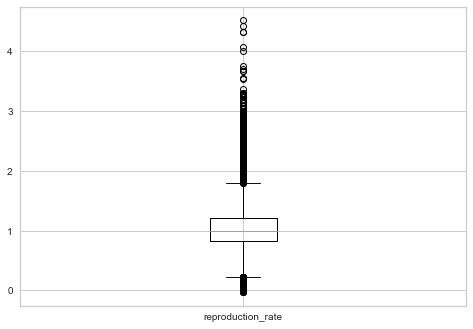

In [9]:
boxplot = covid_df.boxplot(column=[ 'reproduction_rate']) 

The reproduction rate, or reproduction number, is an epidemiologic metric used to describe the contagiousness or transmissibility of infections agents. Outbreaks are expected to continue if this rate is larger than one. If the rate is less than one, then the outbreak is beginning to slow or decrease overall. The mean and median values for reproduction_rate in this dataset are centered around 1. At 1, we would expect a strong level of contagiousness or transmissibility. This graph also identifies that there are many outliers far greater than 1. Those outliers could be due to the Omicron variant that is more transmissible than the previous variants. Those specific outliers would be good candidates for inspection in a future analysis.

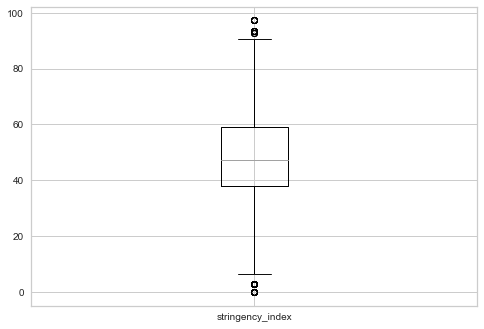

In [10]:
boxplot = covid_df.boxplot(column=[ 'stringency_index'])

The graph suggest that most locations adopted moderate restrictions during the pandemic. Furthermore, some locations did not adopt any restrictions.

sns.set_style("whitegrid");
sns.histplot(x ="stringency_index",
             hue = 'continent',
            palette = "colorblind",
            data = covid_df );

Grouping the data by continent, we created a historgram of stringency_index. The data suggests that continents had many countries that exhibited a stringency_index between 40 and 50. However, Africa seems to show that there were a number of countries with a stringency_index lower than 20. This could be due to Africa not having enough reported data. 

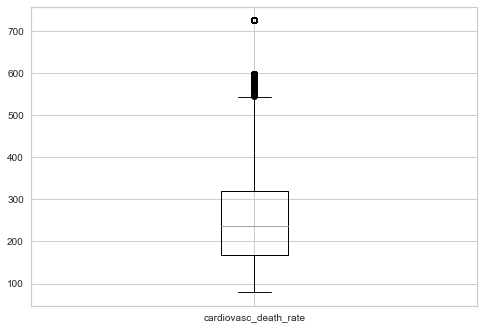

In [11]:
boxplot = covid_df.boxplot(column=[ 'cardiovasc_death_rate'])

This boxplot shows that the values for the cardiovascular death rate were centered around 200 and 300 deaths per 100,000 people. After inspection, this attribute may not be useful in future models due to its relevance.

selected_columns = covid_df[["new_deaths","human_development_index","reproduction_rate","stringency_index","new_people_vaccinated_smoothed","new_cases"]]
new_df = selected_columns.copy()
print(new_df)
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax = 1, center =0,
    cmap=sns.diverging_palette(50, 5000, n=200),
    square=True
)

**Human Development Index,Reproduction Rate,Stringency index,New People Vaccinated Smoothed,New Deaths, and New Cases Heatmap** It is interesting to see that the New-people-vaccinated-smoothed attribute is more correlated with new-deaths than with new-cases.  I would assume that the more people who die because of this disease, the more one would want to get vaccinated for it (or governments pushing for vaccinations).  Another interesting feature of this graph is that the human-development-index is quite correlated with the Covid reproduction rate, as in the higher the index the higher the reproduction rate.  I can't think why that would be; I would think it would be the other way around. Also, the stringency index is correlated with new cases, new deaths,and new people vaccinated smoothed which seems likely but it is also correlated with the human development index.  And, it is not correlated with reproduction rate.  If it had been correlated with reproduction rate, I would think it would have been negatively correlated.

**TODO: I need to continue working on this**

## Modeling and Evaluation 1

In [12]:
#K-Means works with Numeric Data
selected_cols = ['new_deaths',                   
   'reproduction_rate',          
    'new_vaccinations_smoothed',   
    'stringency_index',             
    'population',                  
    'median_age',                 
    'aged_65_older',               
    'gdp_per_capita',              
    'cardiovasc_death_rate',        
    'diabetes_prevalence',         
   'handwashing_facilities',       
   'hospital_beds_per_thousand',   
   'life_expectancy',             
   'human_development_index' ]
cluster_data = covid_df.loc[:,selected_cols]

In [13]:
from tslearn.clustering import TimeSeriesKMeans
#model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
#model.fit(cluster_data)

In [14]:
#x=model.fit(cluster_data)

In [15]:
%%time
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)



CPU times: user 35 µs, sys: 7 µs, total: 42 µs
Wall time: 67 µs


CPU times: user 29.3 ms, sys: 4.02 ms, total: 33.3 ms
Wall time: 31.8 ms


Text(0.5, 1.0, 'Visualization of raw data')

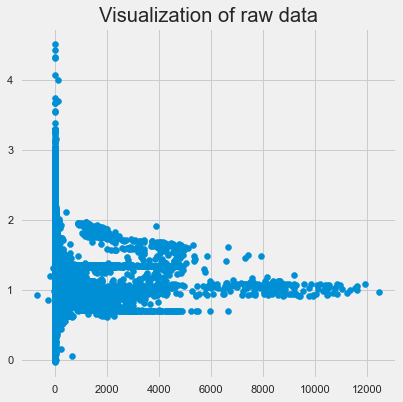

In [16]:
%%time
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = cluster_data

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
#plt.xlabel('')
#plt.ylabel('')
plt.title('Visualization of raw data');

CPU times: user 22.5 s, sys: 483 ms, total: 23 s
Wall time: 23.4 s


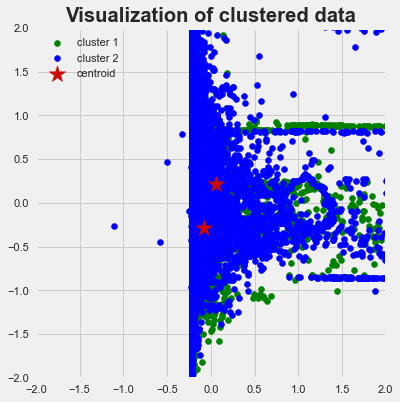

In [17]:
%%time
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = TimeSeriesKMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
#plt.xlabel('')
#plt.ylabel('')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

CPU times: user 53.6 s, sys: 1.9 s, total: 55.5 s
Wall time: 55 s


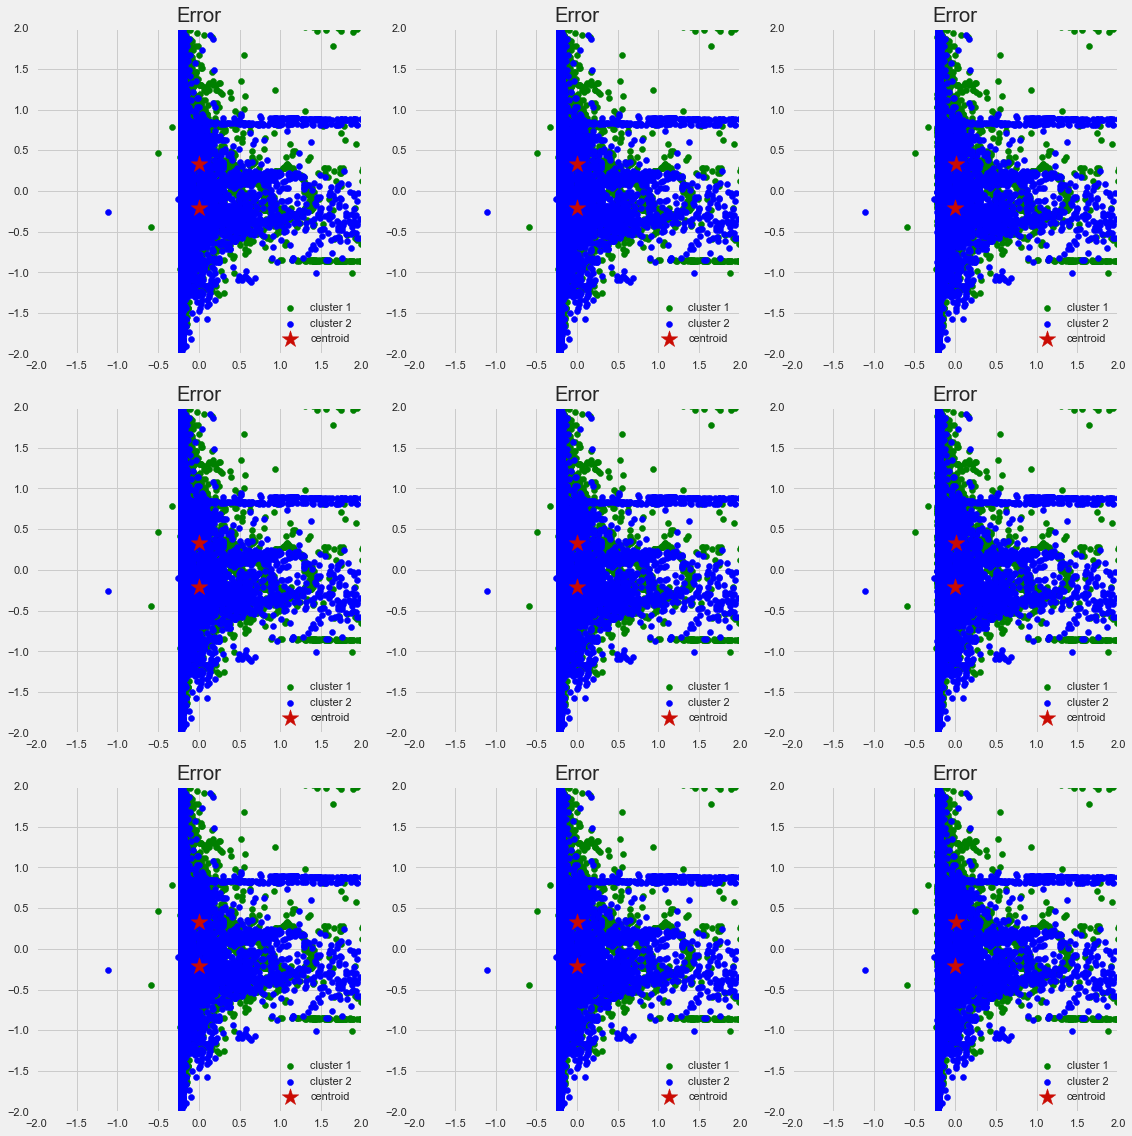

In [20]:
%%time
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0)
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title('Error')
    ax[i].set_aspect('equal')
plt.tight_layout();

CPU times: user 3min 42s, sys: 32.4 s, total: 4min 15s
Wall time: 3min 36s


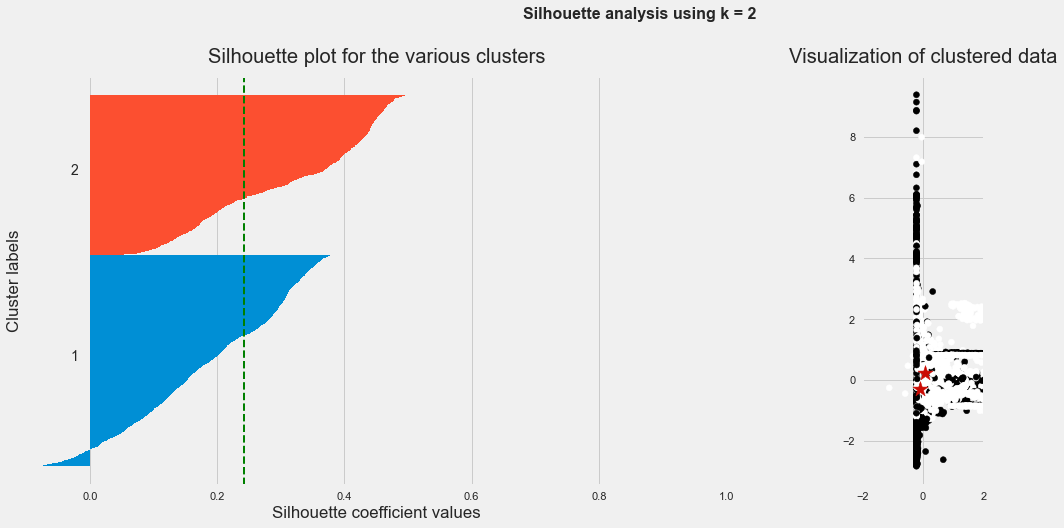

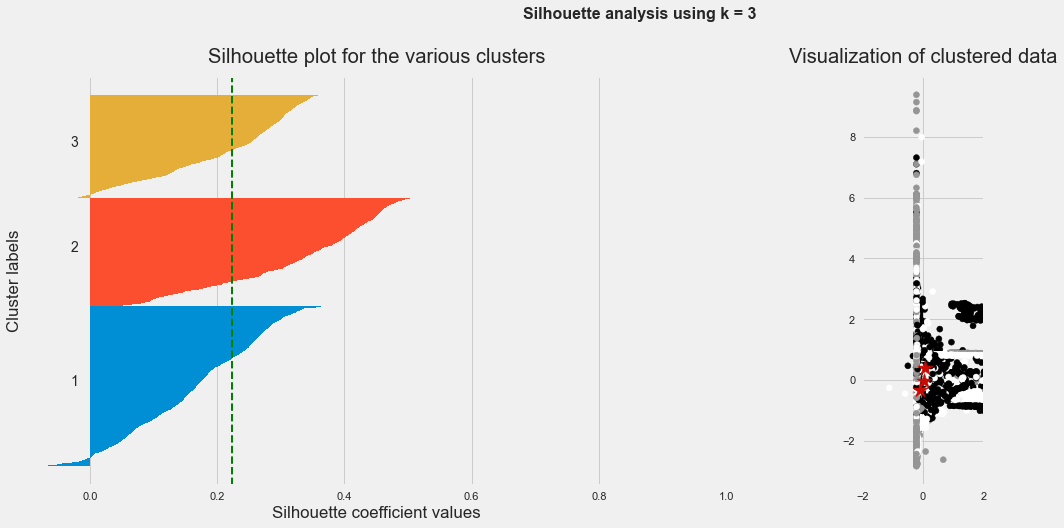

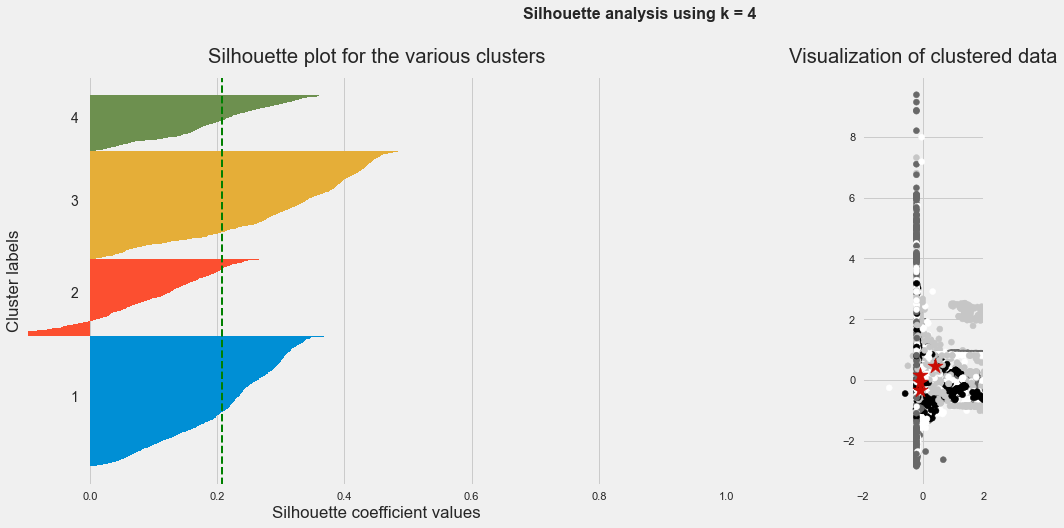

In [19]:
%%time
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = TimeSeriesKMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [22]:
clustered_data.groupby(['Cluster']).mean().round(1)

array([[[ 0.00601726],
        [ 0.3309084 ],
        [ 0.06813318],
        [-0.05832333],
        [ 0.045761  ],
        [ 1.04310923],
        [ 1.05535107],
        [ 0.70223197],
        [-0.23389905],
        [-0.00299397],
        [ 0.20268149],
        [ 0.74642026],
        [ 0.75533545],
        [ 0.90830488]],

       [[-0.00373972],
        [-0.20565924],
        [-0.0423447 ],
        [ 0.03624789],
        [-0.02844042],
        [-0.64829134],
        [-0.65589963],
        [-0.43643646],
        [ 0.14536803],
        [ 0.00186075],
        [-0.12596634],
        [-0.46389944],
        [-0.46944023],
        [-0.56451057]]])

As the above plots show, n_clusters=3 has the best average silhouette score of around 0.25 and compared with other its actually good choice.

### Train and adjust parameters <br>
bla bla

## Modeling and Evaluation 2

### Evaluate and Compare  <br>
bla bla

## Modeling and Evaluation 3

### Visualize results <br>
bla bla

##  Modeling and Evaluation 4 

### Summarize the Ramifications <br>
bla bla

## Deployment - Dawn

### Did you achieve your goals?  <br>

We wanted a model that could determine what features would  contribute to decreased / increased Covid cases and decreased / increased Covid deaths.  We needed a method that could predict Covid outcomes.  We did achieve our goals with an kNN model of new-deaths with an accuracy of 0.689.  For our new-cases predictor, our random forest regressor model had a RMSE of 227.91.  However the important attributes for the models were mostly population, again the other features were dwarfed by the large imput of population data.  
This model might be more useful on a country by country range.

### How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?  <br>

The models created for this analysis use different prediction methods to determine the range of new cases and the number of new deaths resulting from Covid-19. While many of these models may have already been created, there is still a lot unknown about Covid-19. So, companies and organizations are eager to obtain any data and information they can get on Covid-19. If companies have a lot of data, they may want to study different models and outcomes, potentially making our models appealing to different organizations. Companies and organizations such as the CDC, Baylor Scott and White, and other participants in the health industry may be interested in these types of models. They may even improve accuracy of the models by incorporating and adding their own data. 

Also, these models could be very useful for life insurance companies so that they can adjust premiums and underwriting. These insurance companies are significantly impacted by Covid-19: 
"Life insurance policies paid out over $90 billion in 2020, a 15.4% increase over 2019. That’s the largest year-over-year increase since the 1918 influenza pandemic." (source: https://fortune.com/2021/12/09/life-insurance-payouts-2020-record-high-covid/)

### How would your deploy your model for interested parties? <br>

The dataset used for this analysis was partially obtained from The Covid-19 Data Repository, which is for the Coronavirus Visual Dashboard by the Center for Systems Science and Engineering at Johns Hopkins University, and many other official sources. Since the pandemic's beginning, many people and groups within the health sector have been contributing and building datasets to study Covid-19. Like these groups, our model could also be deployed to GitHub, and we could allow the public to download, execute, and improve our models. To specifically deploy our models to interested parties, we could collaborate with non-profit public health organizations that collaborate with hospitals, primary care facilities, and other health establishments. 

### What other data should be collected? <br>

Other data that should be collected may include observations for the variants of Covid-19. Since the viruses continues to mutate, there may be other features that could be implemented in the model. Futhermore, we may discover that some features in the original model are no longer relevant.
Another data category that could be useful for analyzing Covid-19 could be symptoms. Throughout the pandemic, different people have been experiencing many different symptoms and enduring many different outcomes from the virus. By analyzing these symptoms, we may be able to better predict the outcomes of getting infected by Covid-19. 

Exploring granular observations for a particular geographic location, such as the United States could be another area of interest.

Lastly, to better understand the impact of Covid, collecting disability data to understand the magnitude of long Covid.

 ### How often would the model need to be updated, etc.? <br>
    
Every day, new data is being created, particularly for Covid-19. As a result, predictive models need to be updated. As we learn more about Covid-19, many new variables may become relevant. While predictive models are capable of handling a lot of new data, too much buildup of new data may cause the models to lose their effectiveness over time. After a month, quarter, or year, updating predictive models with new data is probably necessary. In order to determine how often a model should be updated, one has to consider how often the data is changing and how often decisions are being made off the model. If data is changing very rapidly or decisions are being made often, frequent updates may be best. When updating the model, you should be sure to investigate the new data, adjust the model, and reevaluate any assumptions made in the creation process.     

## Exceptional Work - Dawn

### You have free reign to provide additional analyses or combine analyses. <br>

bla bla